In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thomaspernet/PythonFinanceClass/master/QuantitativeFinance/Datasets/R_data/2016_10_12_bank_prices.csv', sep = ";")

In [3]:
df.head()

,Date,MSCIWorldpreviousdayquote,FTSEALLWORLDINDEX,Eurostoxx,Eurostoxxbanks,USbanksDowJonesindex,VIXindexofVolatilityonChicagoDerivativesmarket%,FXEURUSD,FXEURGBP,FXEURCHF,...,CREDITSUISSEGROUPAGREG,BARCLAYSPLCGB,HSBCHOLDINGSPLCGB,ROYALBANKOFSCOTLANDGROUPGB,NORDEABANKAB,JPMORGANCHASECo,CITIGROUPINC,BANKOFAMERICA,GOLDMANSACHSGroup,MORGANSTANLEY
0,12/10/2016,"1700,33","272,35","339,97","96,14","3839,01","15,77","1,1025","0,89807","1,09108",...,"13,13","171,9","614,3","179,8","88,9","68,31","48,99","16,11","169,04","32,18"
1,11/10/2016,"1700,33","272,81","340,17","95,6","3839,01","15,36","1,1054","0,91182","1,09312",...,"13,18","172,4","618,5",181,88,"68,31","48,99","16,11","169,04","32,18"
2,10/10/2016,"1719,29","275,88","341,98","95,87","3873,53","13,38","1,1139","0,90104","1,09454",...,"13,16","172,3","624,8","178,6","90,3","68,64","49,55","16,3","171,04","32,56"
3,09/10/2016,"1712,4","274,84","339,64","95,51","3847,27","13,48","1,1201","0,90005","1,09423",...,"13,06","173,6","619,5","181,9","90,4","68,11","49,28","16,13","169,83","32,31"
4,08/10/2016,"1712,4","274,84","339,64","95,51","3847,27","13,48","1,1201","0,90005","1,09423",...,"13,06","173,6","619,5","181,9","90,4","68,11","49,28","16,13","169,83","32,31"


In [4]:
df_final = df[['Date','BNPPARIBAS', 'CREDITAGRICOLESA', 'BPCE','SOCIETEGENERALESA']]
df_final = df_final.set_index('Date')
df_final = df_final.apply(lambda x: x.str.replace(',','.'))

In [5]:
for x in ['BNPPARIBAS', 'CREDITAGRICOLESA','BPCE','SOCIETEGENERALESA']:
    df_final[x] = pd.to_numeric(df_final[x], errors='ignore')

In [6]:
df_final.dtypes

BNPPARIBAS           float64
CREDITAGRICOLESA     float64
BPCE                 float64
SOCIETEGENERALESA    float64
dtype: object

In [7]:
df_final.head()

,BNPPARIBAS,CREDITAGRICOLESA,BPCE,SOCIETEGENERALESA
Date,,,,
12/10/2016,48.355,9.420,4.431,33.215
11/10/2016,48.550,9.255,4.415,33.040
10/10/2016,49.100,9.189,4.446,33.075
09/10/2016,49.310,9.105,4.440,32.870
08/10/2016,49.310,9.105,4.440,32.870


In [8]:
df_final.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

Stationartity

In [11]:
df_final.apply(lambda x: adf_test(x))

Results of Augmented Dickey-Fuller test:
test statistic            -1.707166
p-value                    0.427424
# of lags                 23.000000
# of observations       3914.000000
Critical Value (1%)       -3.432022
Critical Value (5%)       -2.862279
Critical Value (10%)      -2.567163
dtype: float64
Results of Augmented Dickey-Fuller test:
test statistic            -0.691067
p-value                    0.849050
# of lags                  5.000000
# of observations       3932.000000
Critical Value (1%)       -3.432014
Critical Value (5%)       -2.862275
Critical Value (10%)      -2.567161
dtype: float64
Results of Augmented Dickey-Fuller test:
test statistic            -0.903803
p-value                    0.786718
# of lags                 13.000000
# of observations       3924.000000
Critical Value (1%)       -3.432018
Critical Value (5%)       -2.862277
Critical Value (10%)      -2.567162
dtype: float64
Results of Augmented Dickey-Fuller test:
test statistic            -0.915812

BNPPARIBAS           None
CREDITAGRICOLESA     None
BPCE                 None
SOCIETEGENERALESA    None
dtype: object

Cointegration

All series are cointegrated

In [56]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_final)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
BNPPARIBAS ::  32.27     > 40.1749   =>   False
CREDITAGRICOLESA ::  9.66      > 24.2761   =>   False
BPCE   ::  2.68      > 12.3212   =>   False
SOCIETEGENERALESA ::  0.01      > 4.1296    =>   False


Daily return

In [12]:
df_final.head()

,BNPPARIBAS,CREDITAGRICOLESA,BPCE,SOCIETEGENERALESA
Date,,,,
12/10/2016,48.355,9.420,4.431,33.215
11/10/2016,48.550,9.255,4.415,33.040
10/10/2016,49.100,9.189,4.446,33.075
09/10/2016,49.310,9.105,4.440,32.870
08/10/2016,49.310,9.105,4.440,32.870


In [13]:
df_return = df_final.copy()
df_return.head()

,BNPPARIBAS,CREDITAGRICOLESA,BPCE,SOCIETEGENERALESA
Date,,,,
12/10/2016,48.355,9.420,4.431,33.215
11/10/2016,48.550,9.255,4.415,33.040
10/10/2016,49.100,9.189,4.446,33.075
09/10/2016,49.310,9.105,4.440,32.870
08/10/2016,49.310,9.105,4.440,32.870


In [14]:
df_return.dtypes

BNPPARIBAS           float64
CREDITAGRICOLESA     float64
BPCE                 float64
SOCIETEGENERALESA    float64
dtype: object

In [15]:
df_return = df_return.pct_change().dropna()

corr matrix

In [16]:
df_return.corr()

,BNPPARIBAS,CREDITAGRICOLESA,BPCE,SOCIETEGENERALESA
BNPPARIBAS,1.000000,0.807486,0.643463,0.817679
CREDITAGRICOLESA,0.807486,1.000000,0.665605,0.821440
BPCE,0.643463,0.665605,1.000000,0.657938
SOCIETEGENERALESA,0.817679,0.821440,0.657938,1.000000


regress each serei

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
mod1 = smf.ols(formula='BNPPARIBAS ~ CREDITAGRICOLESA + SOCIETEGENERALESA +BPCE', data=df_return).fit()
mod2 = smf.ols(formula='CREDITAGRICOLESA ~ BNPPARIBAS + SOCIETEGENERALESA+BPCE', data=df_return).fit()
mod3 = smf.ols(formula='SOCIETEGENERALESA ~ CREDITAGRICOLESA + BNPPARIBAS+BPCE', data=df_return).fit()
mod4 = smf.ols(formula='BPCE ~SOCIETEGENERALESA+ CREDITAGRICOLESA + BNPPARIBAS', data=df_return).fit()

AR(q)

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib
import matplotlib.pyplot as plt

In [29]:
df_return.apply(lambda x: adf_test(x))

Results of Augmented Dickey-Fuller test:
test statistic         -1.150753e+01
p-value                 4.339275e-21
# of lags               2.800000e+01
# of observations       3.908000e+03
Critical Value (1%)    -3.432024e+00
Critical Value (5%)    -2.862280e+00
Critical Value (10%)   -2.567164e+00
dtype: float64
Results of Augmented Dickey-Fuller test:
test statistic           -33.141061
p-value                    0.000000
# of lags                  3.000000
# of observations       3933.000000
Critical Value (1%)       -3.432014
Critical Value (5%)       -2.862275
Critical Value (10%)      -2.567161
dtype: float64
Results of Augmented Dickey-Fuller test:
test statistic         -9.776296e+00
p-value                 6.920565e-17
# of lags               2.700000e+01
# of observations       3.909000e+03
Critical Value (1%)    -3.432024e+00
Critical Value (5%)    -2.862280e+00
Critical Value (10%)   -2.567164e+00
dtype: float64
Results of Augmented Dickey-Fuller test:
test statistic       

BNPPARIBAS           None
CREDITAGRICOLESA     None
BPCE                 None
SOCIETEGENERALESA    None
dtype: object

In [24]:
def PAC(y, lag = 10): 
    f, (ax1, ax2) = plt.subplots(2, sharex=True)
    plot_acf(y, ax=ax1, lags = lag)
    plot_pacf(y, ax=ax2, lags = lag)
    plt.show()

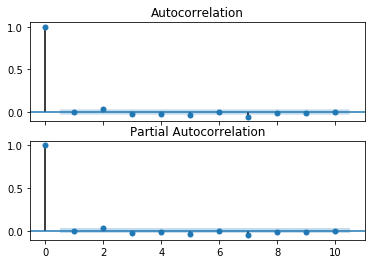

In [28]:
PAC(y = df_return['BNPPARIBAS'])

From the PAC, AR 1

In [38]:
def AR(x):
    
    modelAR1 = ARIMA(df_return[x], order=(1,0,0)).fit(
    trend = 'nc',
)
    
    return modelAR1.summary()
    

In [39]:
AR(x = 'BNPPARIBAS')

/Users/thomas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             BNPPARIBAS   No. Observations:                 3937
Model:                     ARMA(1, 0)   Log Likelihood                9383.835
Method:                       css-mle   S.D. of innovations              0.022
Date:                Wed, 25 Sep 2019   AIC                         -18763.670
Time:                        19:19:40   BIC                         -18751.113
Sample:                             0   HQIC                        -18759.215
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ar.L1.BNPPARIBAS     0.0014      0.016      0.091      0.928      -0.030       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          691.8443           +0.0000j          691.8443            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
# CREDITAGRICOLESA + SOCIETEGENERALESA +BPCE
AR(x = 'CREDITAGRICOLESA')

/Users/thomas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       CREDITAGRICOLESA   No. Observations:                 3937
Model:                     ARMA(1, 0)   Log Likelihood                9074.126
Method:                       css-mle   S.D. of innovations              0.024
Date:                Wed, 25 Sep 2019   AIC                         -18144.252
Time:                        19:20:17   BIC                         -18131.696
Sample:                             0   HQIC                        -18139.798
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
ar.L1.CREDITAGRICOLESA     0.0315      0.016      1.978      0.048       0.000       0.063
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           31.7309           +0.0000j           31.7309            0.0000
-----------------------------------------------------------------------------
"""

In [41]:
AR(x = 'SOCIETEGENERALESA')

/Users/thomas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      SOCIETEGENERALESA   No. Observations:                 3937
Model:                     ARMA(1, 0)   Log Likelihood                8903.369
Method:                       css-mle   S.D. of innovations              0.025
Date:                Wed, 25 Sep 2019   AIC                         -17802.738
Time:                        19:20:19   BIC                         -17790.181
Sample:                             0   HQIC                        -17798.283
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ar.L1.SOCIETEGENERALESA     0.0497      0.016      3.121      0.002       0.018       0.081
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           20.1296           +0.0000j           20.1296            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
AR(x = 'BPCE')

/Users/thomas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   BPCE   No. Observations:                 3937
Model:                     ARMA(1, 0)   Log Likelihood                8617.710
Method:                       css-mle   S.D. of innovations              0.027
Date:                Wed, 25 Sep 2019   AIC                         -17231.419
Time:                        19:20:21   BIC                         -17218.863
Sample:                             0   HQIC                        -17226.965
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.BPCE     0.0322      0.016      2.020      0.043       0.001       0.063
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           31.0876           +0.0000j           31.0876            0.0000
-----------------------------------------------------------------------------
"""

VAR

In [43]:
from statsmodels.tsa.api import VAR

In [45]:
varmodel = VAR(df_return)

/Users/thomas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [47]:
print(varmodel.select_order(maxlags = 10,
                            trend = 'c')
     )

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 6, BIC -> 0, FPE -> 6, HQIC -> 0>


In [48]:
results = varmodel.fit(6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 25, Sep, 2019
Time:                     19:26:10
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -32.5787
Nobs:                     3931.00    HQIC:                  -32.6817
Log likelihood:           42135.8    FPE:                6.05235e-15
AIC:                     -32.7383    Det(Omega_mle):     5.90081e-15
--------------------------------------------------------------------
Results for equation BNPPARIBAS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.000301         0.000354            0.850           0.396
L1.BNPPARIBAS               -0.083599         0.030749           -2.719           0.007
L1.CREDITAGRICOLESA        

Granger

Need to do all the vars

In [51]:
# Granger causality
print(results.test_causality('BNPPARIBAS', 'CREDITAGRICOLESA'))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: CREDITAGRICOLESA does not Granger-cause BNPPARIBAS: reject at 5% significance level. Test statistic: 2.155, critical value: 2.099>, p-value: 0.044>


Predict

In [58]:
results.k_ar

6

In [63]:
df_return.tail(1).to_numpy()

array([[-0.00364449, -0.00967845,  0.00715933,  0.00386454]])

In [66]:
forcast = results.forecast(y=df_return.tail(6).to_numpy(), steps=1)

-0.0003860825973820822

In [74]:
print('forecast is  {0} and sd is {1}  and  {2}'.format(forcast[0][0],
                                                        forcast[0][1],
                                                       forcast[0][2]))

forecast is  -0.0003860825973820822 and sd is 0.001136351334427499  and  -0.00040272655851726743


CAPM

In [88]:
stock_index = pd.Series(df_final.sum(axis = 1), name = 'index')

In [89]:
return_index = stock_index.pct_change(1).dropna()

In [91]:
df_return_serie=  pd.concat([return_index, df_return], axis = 1)
df_return_serie.head()

,index,BNPPARIBAS,CREDITAGRICOLESA,BPCE,SOCIETEGENERALESA
Date,,,,,
11/10/2016,-0.001687,0.004033,-0.017516,-0.003611,-0.005269
10/10/2016,0.005774,0.011329,-0.007131,0.007022,0.001059
09/10/2016,-0.000887,0.004277,-0.009141,-0.001350,-0.006198
08/10/2016,0.000000,0.000000,0.000000,0.000000,0.000000
07/10/2016,0.000000,0.000000,0.000000,0.000000,0.000000


regress each bank on stock

In [98]:
mod1 = smf.ols(formula='index ~ CREDITAGRICOLESA', data=df_return_serie).fit()
mod2 = smf.ols(formula='index ~ BNPPARIBAS ', data=df_return_serie).fit()
mod3 = smf.ols(formula='index ~ CREDITAGRICOLESA', data=df_return_serie).fit()
mod4 = smf.ols(formula='index ~BPCE', data=df_return_serie).fit()

In [103]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  index   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 1.418e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:47:21   Log-Likelihood:                 12417.
No. Observations:                3937   AIC:                        -2.483e+04
Df Residuals:                    3935   BIC:                        -2.482e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9.964e-06      0.000     -0.061      0.952      -0.000       0.000
CREDITAGRICOLESA     0.8117      0.007    119.063      0.000       0.798       0.825
==============================================================================
Omnibus:                      728.198   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19070.218
Skew:                           0.066   Prob(JB):                         0.00
Kurtosis:                      13.781   Cond. No.                         41.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BNP most sensitive bank?

In [100]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  index   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 3.734e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:47:08   Log-Likelihood:                 14039.
No. Observations:                3937   AIC:                        -2.807e+04
Df Residuals:                    3935   BIC:                        -2.806e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.000      1.025      0.305      -0.000       0.000
BNPPARIBAS     0.9444      0.005    193.231      0.000       0.935       0.954
==============================================================================
Omnibus:                      970.790   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52614.642
Skew:                          -0.257   Prob(JB):                         0.00
Kurtosis:                      20.902   Cond. No.                         44.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  index   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 1.418e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:47:11   Log-Likelihood:                 12417.
No. Observations:                3937   AIC:                        -2.483e+04
Df Residuals:                    3935   BIC:                        -2.482e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9.964e-06      0.000     -0.061      0.952      -0.000       0.000
CREDITAGRICOLESA     0.8117      0.007    119.063      0.000       0.798       0.825
==============================================================================
Omnibus:                      728.198   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19070.218
Skew:                           0.066   Prob(JB):                         0.00
Kurtosis:                      13.781   Cond. No.                         41.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  index   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     4032.
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:47:40   Log-Likelihood:                 10801.
No. Observations:                3937   AIC:                        -2.160e+04
Df Residuals:                    3935   BIC:                        -2.158e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.791e-05      0.000      0.394      0.693      -0.000       0.001
BPCE           0.5813      0.009     63.502      0.000       0.563       0.599
==============================================================================
Omnibus:                      992.184   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31329.111
Skew:                           0.539   Prob(JB):                         0.00
Kurtosis:                      16.777   Cond. No.                         36.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""